# Assignment 1: k-nearest neighbors (Programming) 

Only use the already imported libraries `numpy` and `matplotlib.pyplot` for the assignment. Do not import any other library. 

==> *Write*
* *names*  - Anamika Ranjan, Swarnendu Sengupta, Stephen Charivukalayil Philipose
* *matr. nr.* - 3570948 , 3574944, 3570841
* *study program* - Electrical Engineering, Electrical Engineering, INFOTECH
* *B.Sc./M.Sc.* - M.Sc.

*of all assignment group participants here.* (double klick here to edit)*

In [41]:
# Load required packages and dataset. Do not modify.
import matplotlib.pyplot as plt
import numpy as np
import random

def load_breast_cancer_dataset():
    from sklearn import datasets
    breast_cancer = datasets.load_breast_cancer()
    X = breast_cancer.data
    y = breast_cancer.target
    return X, y
    
X, y = load_breast_cancer_dataset()


## Task 1: Visualization and Preprocessing

1) Explain the content of the dataset in few words. What are the input features? What is the classification target? Check out: [https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)].


**Answer:**

The dataset contains characteristics of the cell nuclei, which were computed from a digitized image of a fine needle aspirate (FNA) of a breast mass which were obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992]. 
The input features are 10 real valued features computed for each cell nucleus which includes  
1.   radius (mean of distances from center to points on the perimeter)
2.   texture (standard deviation of gray-scale values) 
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour) 
8. concave points (number of concave portions of the contour)
9. symmetry 
10. fractal dimension ("coastline approximation" - 1) 
There are 3 cell nucleus for each daat point.


The classification target is Diagnosis (M = malignent or B = benign). Here, M is represented as 0, while B is represented as 1.

2) Compute and print the following statistics about the dataset:
  - Number of samples
  - Number of samples per class
  - Mean and standard deviation for each input feature


In [42]:
# Implement your solution here.
random.seed(10)

print("There are total "+ str(X.shape[0])+ " examples")
malignent = sum(y==0)
print("Malignent is : "+ str(malignent))
benign = sum(y==1)
print("Benign is : "+ str(benign))

# mean and sd
mean_ds = np.mean(X,0)
sd_ds = np.sqrt(np.var(X,0))
print("The mean are " + str(mean_ds)+" for all the features \n")
print("The sd are " + str(sd_ds)+ " for all the features")


There are total 569 examples
Malignent is : 212
Benign is : 357
The mean are [1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
 9.63602812e-02 1.04340984e-01 8.87993158e-02 4.89191459e-02
 1.81161863e-01 6.27976098e-02 4.05172056e-01 1.21685343e+00
 2.86605923e+00 4.03370791e+01 7.04097891e-03 2.54781388e-02
 3.18937163e-02 1.17961371e-02 2.05422988e-02 3.79490387e-03
 1.62691898e+01 2.56772232e+01 1.07261213e+02 8.80583128e+02
 1.32368594e-01 2.54265044e-01 2.72188483e-01 1.14606223e-01
 2.90075571e-01 8.39458172e-02] for all the features 

The sd are [3.52095076e+00 4.29725464e+00 2.42776193e+01 3.51604754e+02
 1.40517641e-02 5.27663291e-02 7.96497253e-02 3.87687325e-02
 2.73901809e-02 7.05415588e-03 2.77068942e-01 5.51163427e-01
 2.02007710e+00 4.54510134e+01 2.99987837e-03 1.78924359e-02
 3.01595231e-02 6.16486075e-03 8.25910439e-03 2.64374475e-03
 4.82899258e+00 6.14085432e+00 3.35730016e+01 5.68856459e+02
 2.28123569e-02 1.57198171e-01 2.08440875e-01 6.56745545e-02
 6.

3) Visualize the variables *radius (mean)* and *texture (mean)* in a scatter plot (*radius (mean)* on the x-axis, *texture (mean)* on the y-axis). Color each point of the plot according to its class.

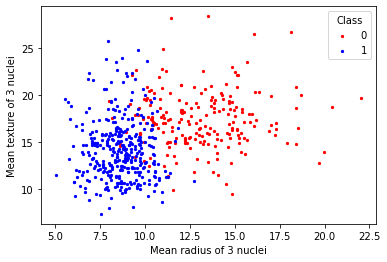

In [43]:
# Implement your solution here.
mean_rad = np.mean(X[:,[0,10,20]], axis = 1)
mean_texture = np.mean(X[:,[1,11,21]], axis = 1)

cdict = {0: 'red', 1: 'blue'}

fig, ax = plt.subplots()
for g in np.unique(y):
    ix = np.where(y == g)
    ax.scatter(mean_rad[ix], mean_texture[ix], c = cdict[g], label = g, s = 5)
ax.legend(title = "Class")
ax.set_xlabel("Mean radius of 3 nuclei")
ax.set_ylabel("Mean texture of 3 nuclei")
plt.show()


4) Split the dataset randomly into training and test data. 70% of data should be used for training and 30% should be used for testing. Implement the function `train_test_split`. Do not modify the interface of the function.

In [44]:
def train_test_split(X, y):
    """
    Returns X_train, X_test, y_train, y_test, 
        where X_train and X_test are the input features of the training and test set,
        and y_train and y_test are the class labels of the training and test set.
    """
    no_of_dp = X.shape[0]
    row_no = list(range(0, no_of_dp))
    random.shuffle(row_no)
    train_ds_size = int(0.7*no_of_dp)
    X_train = X[:train_ds_size,]
    X_test = X[train_ds_size:,]
    y_train = y[:train_ds_size]
    y_test = y[train_ds_size:]
    return X_train,X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y)

assert (X_train.shape[0] + X_test.shape[0]) == X.shape[0]
assert (y_train.shape[0] + y_test.shape[0]) == y.shape[0]
assert X_train.shape[1] == X_test.shape[1]

5) kNN uses a distance measure to identify close neighbors. If the input features are not of the same scale, the distance is not as meaningful, which can negatively impact classification performance. Perform min-max scaling (i.e. scale the values of the input features in such a way that their range is from 0 to 1) on the training and test data. Remember that you should only use information from the training data to perform the scaling on both data sets.

In [45]:
# Implement your solution here
# When we perform the same scaling on both the datasets, there is a chance that the data in test would not be in [0,1]. It cn be less than 0 or more than 1.
X_train_std = (X_train - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))
print(X_train_std.shape)
X_test_std = (X_test - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))
print(X_test_std.shape)
print(np.max(X_test_std))
print(np.min(X_test_std))

(398, 30)
(171, 30)
1.2531723543180977
-0.12020927120087593


## Task 2: k-nearest neighbors 
*Choose classes randomly if weights are equal for multiple classes*

**For B.Sc. Data Science:**  

Implement the kNN algorithm with uniform weighting and arbitrary `k`. Fill out the `predict` method of class `KNearestNeighbors`. 

Use Euclidean distance to determine the nearest neighbors.
You can ignore the optional parameter `weights`, which is provided as a field in the kNN class.

**For all students other than B.Sc. Data Science:**

Implement the kNN algorithm with uniform and distance-based weighting and arbitrary `k`.
Fill out the `predict` method of class `KNearestNeighbors`.

The parameter `weights` will either contain the string `uniform` or `distance`. 
- If the value is `uniform`, the classifier should use the Euclidean distance for determining nearest neighbors and uniform weighting. 
- If the value is a `distance`, the classifier should use the Euclidean distance for determining neares neighbors and perform distance-weighted classification.

In [46]:
class KNearestNeighbors(object):
    def __init__(self, k, weights='uniform'):
        self.k = k
        self.weights = weights
        
    def fit(self, X, y):
        """
        This functions saves the training data to be used during the prediction.
        """
        self.X = X
        self.y = y
    
    def predict(self, X):
        """
        Returns a vector of shape (n,) if X has shape (n,d), 
        where n is the number of samples and d is the number of features.
        """
        # Implement your solution here.
        X_train = self.X
        y_train = self.y
        num_neighbours = self.k
        X_test = X
        y_pred = []
        #print(X_test.shape)
        for x_test in X_test:
          eu_dist = []
          for x_train in X_train:
            eu_dist.append(euclidean_distance(x_train, x_test))
          sort_index = np.argsort(eu_dist)
          eu_dist.sort()
          #print(eu_dist[0:10])
          neighbours = list()
          for i in range(num_neighbours):
            neighbours.append(sort_index[i])
#          print(neighbours)
#          print(eu_dist[:num_neighbours])
#          print(y_train[neighbours])
          t0 = y_train[neighbours]==0
          tmp_t0 = [i for i, x in enumerate(t0) if x]
          tmp_eu_dist0 = [eu_dist[i] for i in tmp_t0]
          t1 = y_train[neighbours]==1
          tmp_t1 = [i for i, x in enumerate(t1) if x]
          tmp_eu_dist1 = [eu_dist[i] for i in tmp_t1]
#          print(tmp_eu_dist)
          tmp_c = list(y_train[neighbours])
          c = [ (i,tmp_c.count(i)) for i in set(tmp_c) ]
          #print(c)
          if self.weights == 'uniform':
            tmp_eu_dist1 = 1
            tmp_eu_dist0 = 1
          if len(c)==1:
            c = c[0][0]
          else:
            c0 = np.average(tmp_eu_dist0)
            c1 = np.average(tmp_eu_dist1)
            #print(c1)
            #print(c0)
            if c0>c1:
              c=1
            elif c0 <c1:
              c=0
            else:
              c0 = np.sum(tmp_eu_dist0)
              c1 = np.sum(tmp_eu_dist1)
              if c0>c1:
                c=0
              else:
                c=1
          #print(c)
          y_pred.append(c)
          #print(y_pred)
        return y_pred
        

    
def euclidean_distance(x1, x2):
    """
    Given vectors x1 and x2 with shape (n,) returns distance between vectors as float.
    """
    return np.sqrt(np.sum((x1 - x2)*(x1 - x2)))

## Task 3: Evaluation

1) Implement functions to compute precision, recall and F1-score. `y_pred` and `y_true` are the vectors of predicted and true class labels respectively with shape `(n,)`, where `n` is the number of samples. Each function should return a float containing the corresponding score. It is advisable to implement a function for the confusion matrix and reuse it.

In [47]:
def precision(y_pred, y_true):
    # Implement your solution here.
    tp = [1 for i, j in zip(y_pred, y_true) if i == j and i==0]
    fp = [1 for i, j in zip(y_pred, y_true) if i == 1 and j==0]
    #print(sum(tp))
    #print(sum(fp))
    #true_positive =sum(y_pred==0 & y_true==0)/y_true.shape[0]
    return sum(tp)/(sum(tp)+sum(fp))

def recall(y_pred, y_true):
    # Implement your solution here.
    tp = [1 for i, j in zip(y_pred, y_true) if i == j and i==0]
    fn = [1 for i, j in zip(y_pred, y_true) if i == 0 and j==1]
    #print(sum(fn))
    return sum(tp)/(sum(tp)+sum(fn))

    
def f1score(y_pred, y_true):
    # Implement your solution here.
    f1 = 2/(1/recall(y_pred, y_true)+1/precision(y_pred, y_train))
    return f1

2) Evaluate the performance of kNN with uniform weighting on the Breast Cancer dataset for `k=1,5,9`. Train each of the `3` classifiers on the training data from Task 1. Perform the predictions on both the training and test data. Then compute precision, recall, and F1-score for each model and for both training and test data. Visualize the performance in a plot, what do you observe?

**For all students other than B.Sc. Data Science:** 

Also evaluate the kNN classifier with Euclidean distance-weighting. Compare the performance to uniform-weighting. How does the performance change compared to uniform weighting for each `k`?

In [48]:
# Implement your solution here.
# train data
# k=1 uniform
print("k=1, uniform")
knn = KNearestNeighbors(1, 'uniform')
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_train_std)
prec_1_train = precision(y_pred, y_train)
print(prec_1_train)
rec_1_train = recall(y_pred, y_train)
print(rec_1_train)
f1_1_train = f1score(y_pred, y_train)
print(f1_1_train)

# k=5 uniform
print("k=5, uniform")
knn = KNearestNeighbors(5, 'uniform')
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_train_std)
prec_5_train = precision(y_pred, y_train)
print(prec_5_train)
rec_5_train = recall(y_pred, y_train)
print(rec_5_train)
f1_5_train = f1score(y_pred, y_train)
print(f1_5_train)

# k=9 uniform
print("k=9, uniform")
knn = KNearestNeighbors(9, 'uniform')
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
prec_9_train = precision(y_pred, y_train)
print(prec_9_train)
rec_9_train = recall(y_pred, y_train)
print(rec_9_train)
f1_9_train = f1score(y_pred, y_train)
print(f1_9_train)


k=1, uniform
1.0
1.0
1.0
k=5, uniform
0.8554913294797688
1.0
0.9221183800623053
k=9, uniform
0.20224719101123595
0.5454545454545454
0.2950819672131147


In [49]:
# Implement your solution here.
# train data
# k=1 distance
print("k=1, distance")
knn = KNearestNeighbors(1, 'distance')
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_train_std)
prec_1_train_w = precision(y_pred, y_train)
print(prec_1_train_w)
rec_1_train_w = recall(y_pred, y_train)
print(rec_1_train_w)
f1_1_train_w = f1score(y_pred, y_train)
print(f1_1_train_w)

# k=5 uniform
print("k=5, distance")
knn = KNearestNeighbors(5, 'distance')
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_train_std)
prec_5_train_w = precision(y_pred, y_train)
print(prec_5_train_w)
rec_5_train_w = recall(y_pred, y_train)
print(rec_5_train_w)
f1_5_train_w = f1score(y_pred, y_train)
print(f1_5_train_w)

# k=9 uniform
print("k=9, distance")
knn = KNearestNeighbors(9, 'distance')
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
prec_9_train_w = precision(y_pred, y_train)
print(prec_9_train_w)
rec_9_train_w = recall(y_pred, y_train)
print(rec_9_train_w)
f1_9_train_w = f1score(y_pred, y_train)
print(f1_9_train_w)


k=1, distance
1.0
1.0
1.0
k=5, distance
0.9884393063583815
0.9941860465116279
0.9913043478260871
k=9, distance
0.2696629213483146
0.42857142857142855
0.3310344827586207


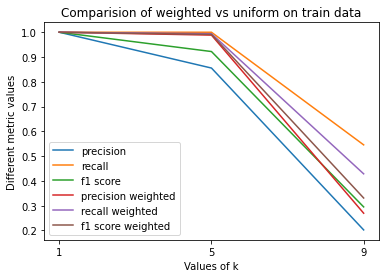

In [50]:
# plotting both to find comparision
# Here we plot
prec_train = [prec_1_train,prec_5_train,prec_9_train]
rec_train = [rec_1_train, rec_5_train, rec_9_train]
f1_train = [f1_1_train, f1_5_train, f1_9_train]
rng = [1,5,9]
prec_train_w = [prec_1_train_w,prec_5_train_w,prec_9_train_w]
rec_train_w = [rec_1_train_w, rec_5_train_w, rec_9_train_w]
f1_train_w = [f1_1_train_w, f1_5_train_w, f1_9_train_w]
plt.title("Comparision of weighted vs uniform on train data")
plt.plot(prec_train,label = "precision")
plt.plot(rec_train, label = "recall")
plt.plot(f1_train, label = "f1 score")
plt.plot(prec_train_w,label = "precision weighted")
plt.plot(rec_train_w, label = "recall weighted")
plt.plot(f1_train_w, label = "f1 score weighted")
plt.xticks([0,1,2],['1','5','9'])
plt.legend()
plt.xlabel("Values of k")
plt.ylabel("Different metric values")
plt.show()

In [51]:
# Implement your solution here.
# test data
# k=1 uniform
print("k=1, uniform")
knn = KNearestNeighbors(1, 'uniform')
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
prec_1 = precision(y_pred, y_test)
print(prec_1)
rec_1 = recall(y_pred, y_test)
print(rec_1)
f1_1 = f1score(y_pred, y_test)
print(f1_1)

# k=5 uniform
print("k=5, uniform")
knn = KNearestNeighbors(5, 'uniform')
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
prec_5 = precision(y_pred, y_test)
print(prec_5)
rec_5 = recall(y_pred, y_test)
print(rec_5)
f1_5 = f1score(y_pred, y_test)
print(f1_5)

# k=9 uniform
print("k=9, uniform")
knn = KNearestNeighbors(9, 'uniform')
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
prec_9 = precision(y_pred, y_test)
print(prec_9)
rec_9 = recall(y_pred, y_test)
print(rec_9)
f1_9 = f1score(y_pred, y_test)
print(f1_9)


k=1, uniform
0.9743589743589743
0.8085106382978723
0.39166479946224514
k=5, uniform
0.8974358974358975
1.0
0.3364485981308411
k=9, uniform
0.8461538461538461
1.0
0.3364485981308411


Text(0, 0.5, 'Different metric values')

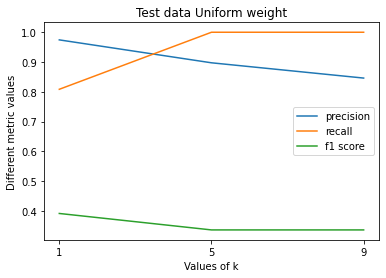

In [52]:
# Here we plot
prec = [prec_1,prec_5,prec_9]
rec = [rec_1, rec_5, rec_9]
f1 = [f1_1, f1_5, f1_9]
rng = [1,5,9]
plt.title("Test data Uniform weight")
plt.plot(prec,label = "precision")
plt.plot(rec, label = "recall")
plt.plot(f1, label = "f1 score")
plt.xticks([0,1,2],['1','5','9'])
plt.legend()
plt.xlabel("Values of k")
plt.ylabel("Different metric values")

Observation (as per test results):

1.   Recall saturates at k =5. Also known as the knee point.
2.   F1 decreases with increase in k as the precision also decreseas. 



In [53]:
#weighted
# k=1 distance
print("k=1, distance")
knn = KNearestNeighbors(1, 'distance')
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
prec_1_w = precision(y_pred, y_test)
print(prec_1_w)
rec_1_w = recall(y_pred, y_test)
print(rec_1_w)
f1_1_w = f1score(y_pred, y_test)
print(f1_1_w)

# k=5 distance
print("k=5, distance")
knn = KNearestNeighbors(5, 'distance')
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
prec_5_w = precision(y_pred, y_test)
print(prec_5_w)
rec_5_w = recall(y_pred, y_test)
print(rec_5_w)
f1_5_w = f1score(y_pred, y_test)
print(f1_5_w)

# k=9 distance
print("k=9, distance")
knn = KNearestNeighbors(9, 'distance')
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
prec_9_w = precision(y_pred, y_test)
print(prec_9_w)
rec_9_w = recall(y_pred, y_test)
print(rec_9_w)
f1_9_w = f1score(y_pred, y_test)
print(f1_9_w)



k=1, distance
0.9743589743589743
0.8085106382978723
0.39166479946224514
k=5, distance
0.9230769230769231
0.7346938775510204
0.38235973216347263
k=9, distance
0.9230769230769231
0.6428571428571429
0.37994722955145116


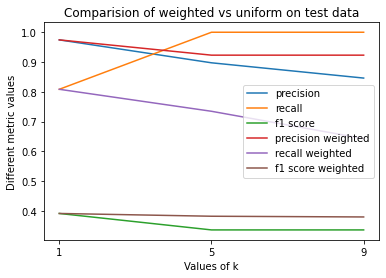

In [54]:
# plotting both to find comparision
# Here we plot
prec = [prec_1,prec_5,prec_9]
rec = [rec_1, rec_5, rec_9]
f1 = [f1_1, f1_5, f1_9]
rng = [1,5,9]
prec_w = [prec_1_w,prec_5_w,prec_9_w]
rec_w = [rec_1_w, rec_5_w, rec_9_w]
f1_w = [f1_1_w, f1_5_w, f1_9_w]
plt.title("Comparision of weighted vs uniform on test data")
plt.plot(prec,label = "precision")
plt.plot(rec, label = "recall")
plt.plot(f1, label = "f1 score")
plt.plot(prec_w,label = "precision weighted")
plt.plot(rec_w, label = "recall weighted")
plt.plot(f1_w, label = "f1 score weighted")
plt.xticks([0,1,2],['1','5','9'])
plt.legend()
plt.xlabel("Values of k")
plt.ylabel("Different metric values")
plt.show()

**Observation**

1. The weighted one performs better as it has a higher F1 score.
2. The lower recall of the weigheted distance is compensated by the higher precision, thus giving a higher F1 score. 

It is very difficult to see it graphically as the values are very close to one another. We can check the values programatically.

In [55]:
print(prec)
print(prec_w)
print(rec)
print(rec_w)
print(f1)
print(f1_w)
print([i<j for i,j in zip(prec, prec_w) if i<=j])
print([i<j for i,j in zip(rec, rec_w) if i<=j])
print([i<j for i,j in zip(f1, f1_w) if i<=j])


[0.9743589743589743, 0.8974358974358975, 0.8461538461538461]
[0.9743589743589743, 0.9230769230769231, 0.9230769230769231]
[0.8085106382978723, 1.0, 1.0]
[0.8085106382978723, 0.7346938775510204, 0.6428571428571429]
[0.39166479946224514, 0.3364485981308411, 0.3364485981308411]
[0.39166479946224514, 0.38235973216347263, 0.37994722955145116]
[False, True, True]
[False]
[False, True, True]


Observation (as per test cases):


1.   At k=1, both of them perform the same for obvious reasons. The weighting is not a factor in these cases.
2.   Except recall, F1 and precision increases with increase in k value. However, we should limit the value of k till a threshold point also known as the knee point.
3. Since in ML, we mainly focus on maximization of F1 score, the focus should more be on the weighted method of kNN.



Another comparision that can be done is on the training dataset vs the test dataset with respective weights. This would give us more insight to the data.

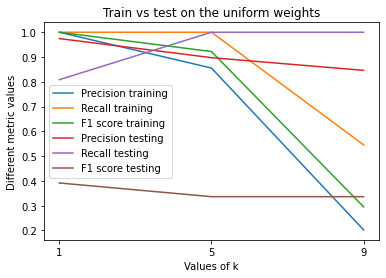

In [56]:
plt.title("Train vs test on the uniform weights")
plt.plot(prec_train, label = "Precision training")
plt.plot(rec_train, label = "Recall training")
plt.plot(f1_train, label = "F1 score training")
plt.plot(prec, label = "Precision testing")
plt.plot(rec, label = "Recall testing")
plt.plot(f1, label = "F1 score testing")
plt.xticks([0,1,2],['1','5','9'])
plt.legend()
plt.xlabel("Values of k")
plt.ylabel("Different metric values")
plt.show()


**Observation:**

1. The max of precision in training and testing is at 5, before dipping down very sharply.
2. The recall is best at 5, when comparing training and testing data.
3. F1 score suggests that we use 5 neighbours. 

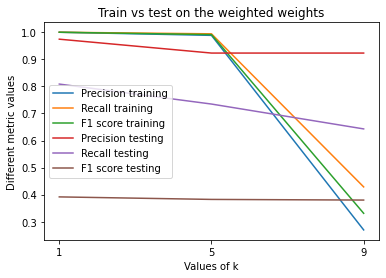

In [57]:
plt.title("Train vs test on the weighted weights")
plt.plot(prec_train_w, label = "Precision training")
plt.plot(rec_train_w, label = "Recall training")
plt.plot(f1_train_w, label = "F1 score training")
plt.plot(prec_w, label = "Precision testing")
plt.plot(rec_w, label = "Recall testing")
plt.plot(f1_w, label = "F1 score testing")
plt.xticks([0,1,2],['1','5','9'])
plt.legend()
plt.xlabel("Values of k")
plt.ylabel("Different metric values")
plt.show()


The observation stands the same as weighted and non-weighted. However one interesting observation is that the F1 score remains almost consistent in the test case, whereas there is a very sharp drop in the precision, recall and F1 score in the training data after k=5. So, it would be best to use k=5.